In [ ]:
# Importing necessary libraries used for data cleaning, and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Ignoring unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# To read the csv file(dataset)
df = pd.read_csv('bank-additional.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [ ]:
# Getting basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

<Axes: >

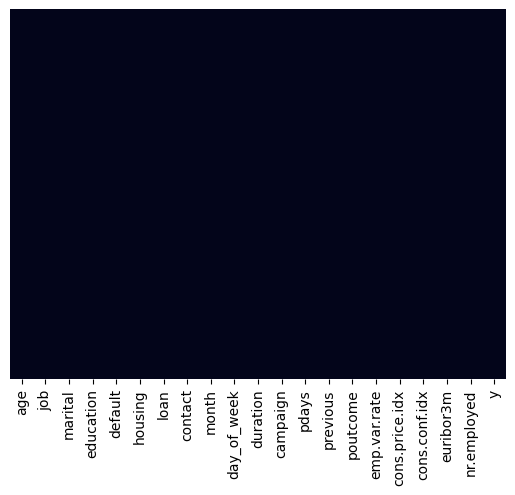

In [ ]:
# To check and remove missing(null) values with heatmap
df.isnull().sum()
df=df.dropna()
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [ ]:
# Mapping categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [ ]:
# Define features and target variable
X = df.drop(columns=['y'])
X
y = df['y']
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
4114,0
4115,0
4116,0
4117,0


# **DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
889,48,0,0,6,0,0,0,0,1,2,544,1,999,0,1,-1.7,94.027,-38.3,0.904,4991.6
2669,35,7,1,2,0,0,2,1,4,2,98,1,999,0,1,1.4,94.465,-41.8,4.958,5228.1
2707,56,3,0,0,0,2,0,0,7,2,212,1,999,1,0,-0.1,93.200,-42.0,4.076,5195.8
2258,29,0,2,6,0,0,0,1,4,2,247,2,999,0,1,-2.9,92.963,-40.8,1.260,5076.2
2514,62,0,1,3,0,0,0,1,5,1,163,2,999,0,1,-1.8,92.843,-50.0,1.520,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,56,5,1,0,0,0,0,0,7,3,130,3,999,0,1,-0.1,93.200,-42.0,4.153,5195.8
3497,54,5,0,0,0,0,0,1,4,1,157,3,999,0,1,1.4,94.465,-41.8,4.865,5228.1
2493,38,0,1,3,0,0,0,0,6,4,275,1,999,0,1,-1.8,92.893,-46.2,1.334,5099.1
3155,43,9,1,5,0,0,0,1,4,2,119,2,999,0,1,1.4,94.465,-41.8,4.866,5228.1


In [ ]:
# Perform MinMax scaling
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# Decision Tree Classifier
from sklearn.tree  import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

***Manipulating various parameters and Displaying best parameter***

In [ ]:
#prepruning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[None,3,4,5],
  'max_features':[None, 'sqrt', 'log2']
  }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=parameter, cv=5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}


In [ ]:
best_score = grid_search.best_score_
print("Best Cross-Validated Score:", best_score)

Best Cross-Validated Score: 0.9115485990756789


***Evaluating the Model***

In [ ]:
y_pred = best_dt_classifier.predict(X_test)

In [ ]:
# Accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.901294498381877


In [ ]:
# Classification report
matrix= classification_report(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1105
           1       0.54      0.48      0.51       131

    accuracy                           0.90      1236
   macro avg       0.74      0.72      0.73      1236
weighted avg       0.90      0.90      0.90      1236



In [ ]:
# Confusion matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[1051,   54],
       [  68,   63]])

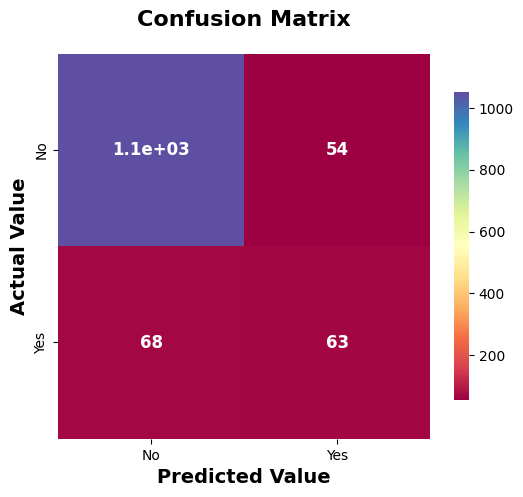

In [ ]:
plt.figure(figsize=(6, 5))
class_names = ['No', 'Yes']
sns.heatmap(cm, annot=True, cmap="Spectral", annot_kws={"size": 12, "weight": "bold"}, cbar_kws={'shrink': 0.8},xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Value', fontsize=14, fontweight='bold')
plt.ylabel('Actual Value', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.show()

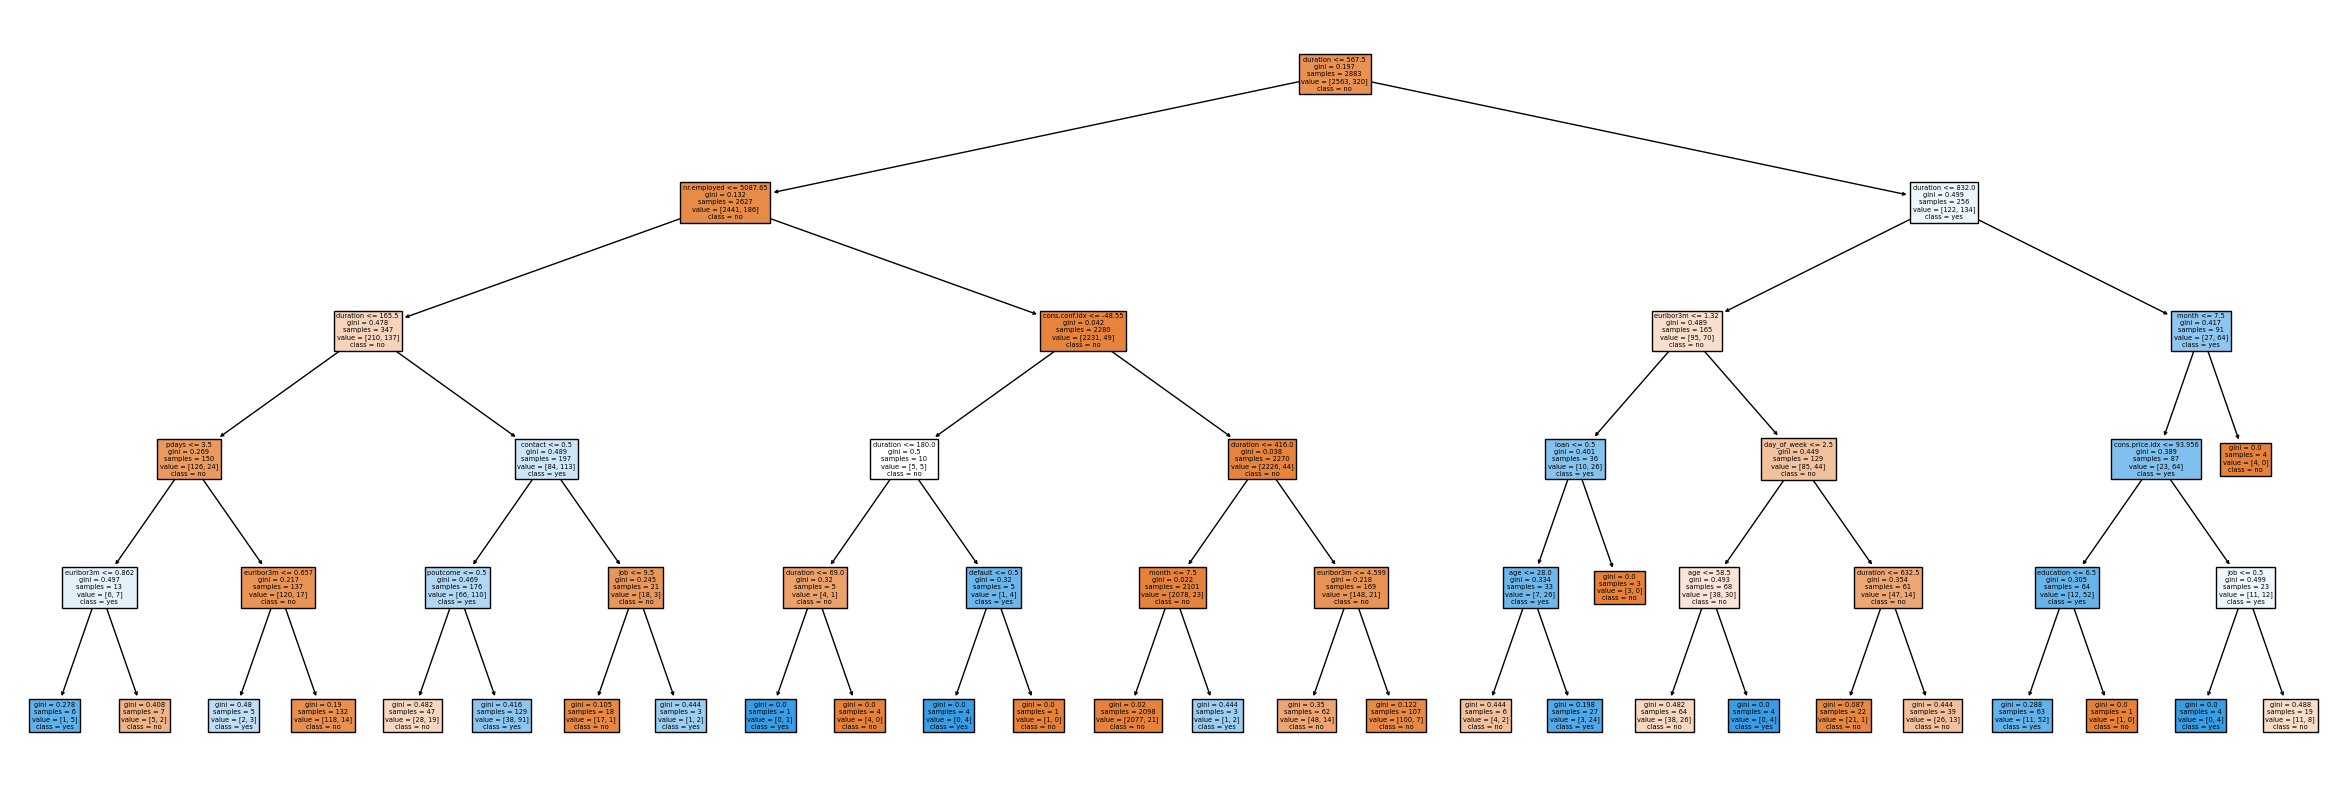

In [ ]:
# Ploting the decision tree
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(best_dt_classifier, filled=True, class_names=['no', 'yes'], feature_names=X.columns)
plt.show()